In [27]:
%matplotlib inline

In [81]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date
style.use('ggplot')

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# List of target users
target_user = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]

# List for dictionaries of results
results_list = []

# Loop through each user
for user in target_user:

    # Counter
    counter = 1

    # Variable for max_id
    oldest_tweet = None
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for _ in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Create a dictionaty of results
            tweet_entity = {
                "Username": user,
                "Date": tweet["created_at"],
                "Compound": compound,
                "Positive": pos,
                "Negative": neu,
                "Neutral": neg,
                "Tweets Ago": counter
            }

            # Append dictionary to list
            results_list.append(tweet_entity)

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
            
            #Add to counter 
            counter += 1

In [127]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(results_list)
sentiments_pd.to_csv('sentiments_pd.csv')
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,Username
0,0.5574,Tue Oct 02 16:06:02 +0000 2018,0.816,0.000,0.184,1,@BBC
1,-0.2732,Tue Oct 02 14:06:04 +0000 2018,0.554,0.242,0.204,2,@BBC
2,0.5994,Tue Oct 02 13:05:03 +0000 2018,0.795,0.000,0.205,3,@BBC
3,0.0000,Tue Oct 02 12:05:04 +0000 2018,1.000,0.000,0.000,4,@BBC
4,0.5719,Tue Oct 02 10:47:27 +0000 2018,0.829,0.000,0.171,5,@BBC


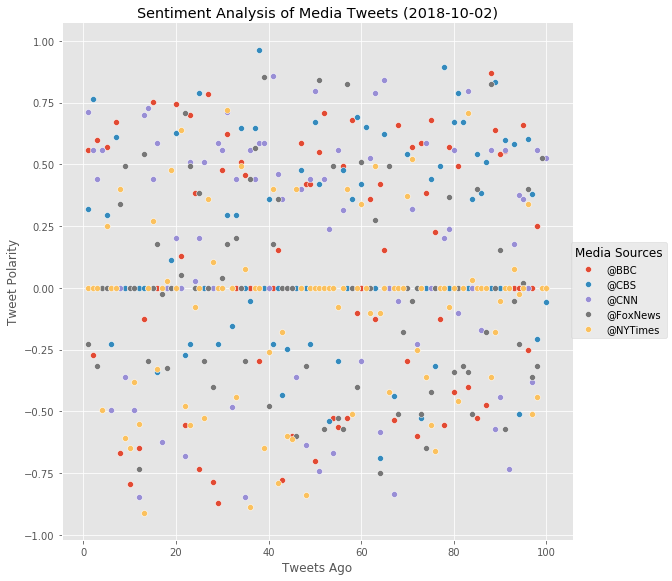

In [126]:
# plot of tweet sentiment by media source
fig = sns.pairplot(x_vars=["Tweets Ago"], 
                        y_vars=["Compound"], data=sentiments_pd, 
                        hue="Username", size=8)
legend = fig._legend
legend.set_title("Media Sources")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({date.today()})") 
plt.savefig('images/sentiments_scatter.png')
plt.show(fig)

In [113]:
# Dataframe of average sentiments
average_df = sentiments_pd.groupby("Username").mean().round(3)
average_df.head()

,Compound,Negative,Neutral,Positive,Tweets Ago
Username,,,,,
@BBC,0.067,0.831,0.071,0.097,50.5
@CBS,0.149,0.876,0.033,0.091,50.5
@CNN,0.122,0.852,0.050,0.099,50.5
@FoxNews,-0.005,0.856,0.072,0.072,50.5
@NYTimes,-0.081,0.879,0.077,0.044,50.5


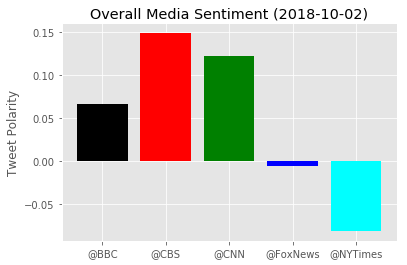

In [129]:
# Bar plot of average compound sentiment
plt.bar(average_df.index, average_df["Compound"], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment ({date.today()})") 
plt.savefig('images/sentiments_bar.png')
plt.show(fig)